# Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


# What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


#  What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


# You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [1]:
# import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#  check random sample of data

In [3]:
df.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
20,United Kingdom,Western Europe,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
63,Russia,Central and Eastern Europe,64,5.716,0.03135,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394


In [4]:
df.shape

(158, 12)

#  There are 158 rows and 12 columns present in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# The target variable happiness score is float data type and this project linear regression model

In [6]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# There are no null value present in data

In [7]:
for i in df.columns:
    print(df[i].value_counts())

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64
0.03780    2
0.03751    2
0.04394    2
0.05051  

In [8]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [9]:
df.drop(columns= ['Happiness Rank','Country'],axis=1,inplace=True)

#  happiness column and country is just a rank given by happiness score wise to each contry so we delete those column

In [10]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# 
 the given statistical information of the numerical column. The summary of the dataset looks perfect since there is no negative value present in data
 From the above description we observed  the following:
 
The counts of the all columns are same which means there is no missing value in the dataset
there is some column mean value is greater then 50 percentile there are right skweness
and also some column mean value is lower than 50 percentile there are left skweness


#  EDA

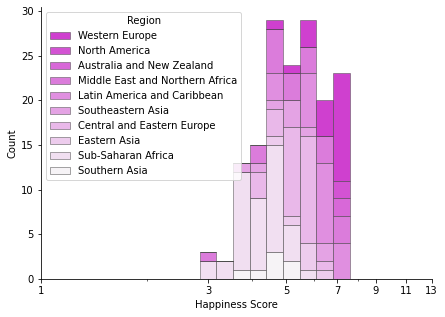

In [11]:
import matplotlib as mpl
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="Happiness Score",hue="Region",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(range(1,15,2))
plt.show()

In [12]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

In [13]:
numerical_col

['Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

# lets check of which features relation in label if any features dont relationship with label we can drop this

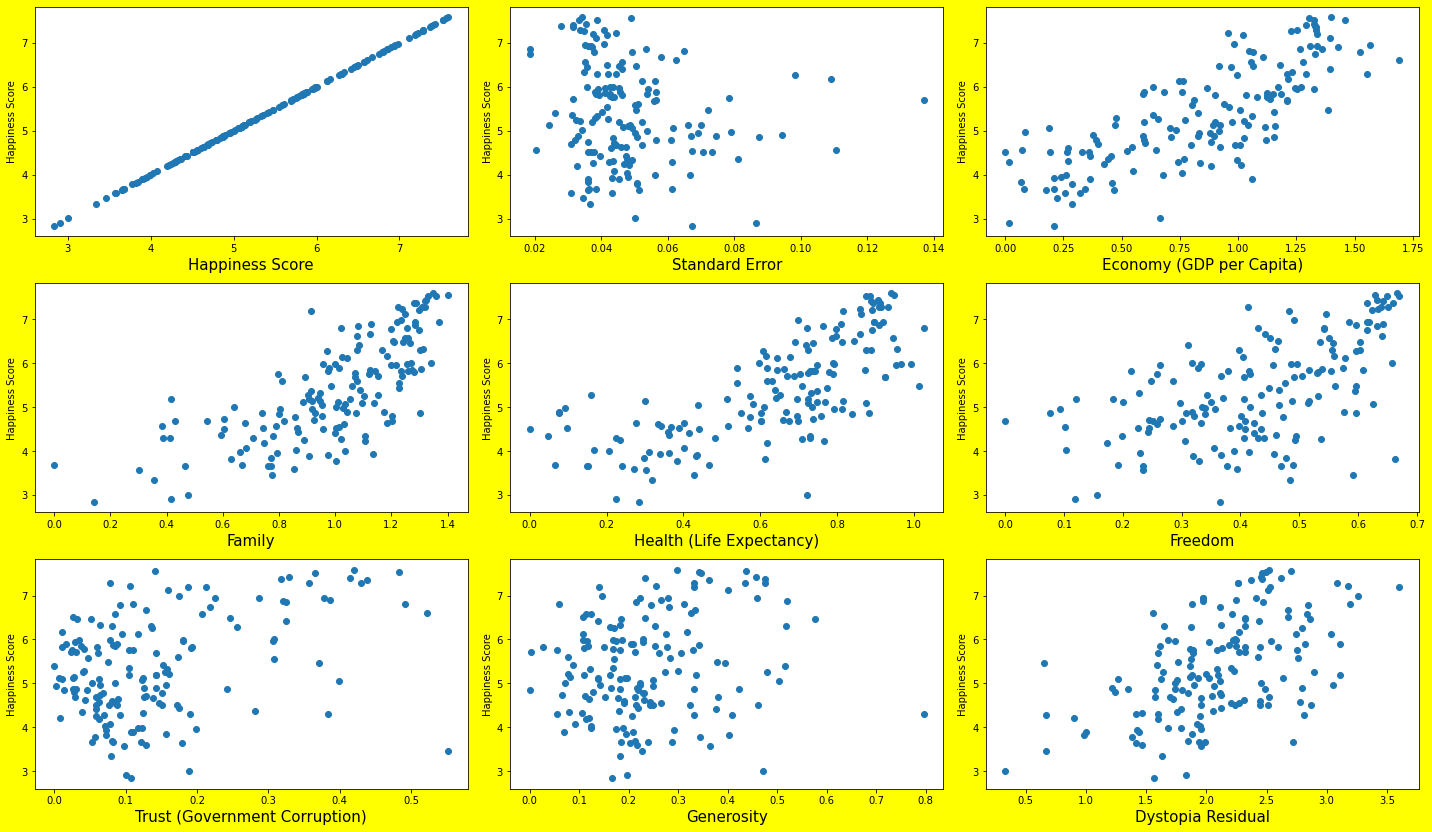

In [17]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber =1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Happiness Score', fontsize=10)
        
    plotnumber+=1
    
plt.tight_layout()    

#  as i analyse  all features have a relation with label whichever is little i'll consider it

#  Let's check the which data is not normally distrubuted

In [ ]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber =1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Happiness Score', fontsize=10)
        
    plotnumber+=1
    
plt.tight_layout() 

#  The data is left and right skewness

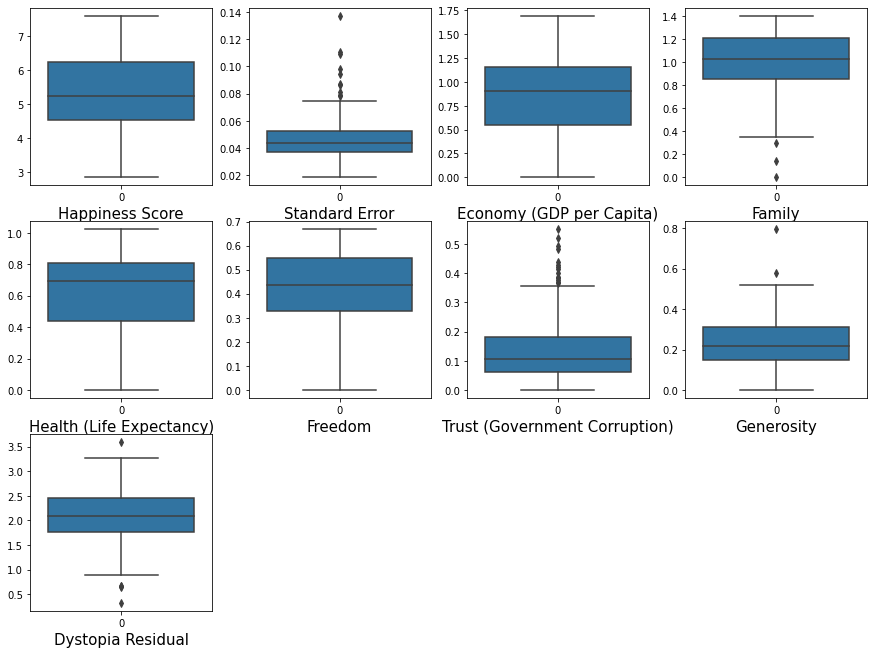

In [18]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


#  
These are outliers present in data 
lets check which one is best method to remove outliers before building a model


In [19]:
from scipy.stats import zscore
outliers= df[['Standard Error','Family','Trust (Government Corruption)','Dystopia Residual']]
z=np.abs(zscore(outliers))
z

,Standard Error,Family,Trust (Government Corruption),Dystopia Residual
0,0.805926,1.320281,2.309652,0.758258
1,0.055889,1.514458,0.016480,1.092857
2,0.854487,1.361054,2.842774,0.712335
3,0.531526,1.251922,1.852081,0.663893
4,0.722845,1.221204,1.555725,0.639337
...,...,...,...,...
153,0.774917,0.800520,3.413922,2.588925
154,0.662582,2.346860,0.529210,0.843967
155,0.132534,1.901086,0.381419,3.208430
156,2.263962,2.118467,0.357715,0.481985


In [20]:
np.where(z<3)

(array([  0,   0,   0,   0,   1,   1,   1,   1,   2,   2,   2,   2,   3,
          3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,   6,   6,
          6,   6,   7,   7,   7,   7,   8,   8,   8,   8,   9,   9,   9,
          9,  10,  10,  10,  10,  11,  11,  11,  11,  12,  12,  12,  12,
         13,  13,  13,  13,  14,  14,  14,  14,  15,  15,  15,  15,  16,
         16,  16,  16,  17,  17,  17,  17,  18,  18,  18,  18,  19,  19,
         19,  19,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,
         22,  23,  23,  23,  23,  24,  24,  24,  24,  25,  25,  25,  25,
         26,  26,  26,  26,  27,  27,  27,  28,  28,  28,  28,  29,  29,
         29,  29,  30,  30,  30,  30,  31,  31,  31,  31,  32,  32,  32,
         32,  33,  33,  33,  33,  34,  34,  34,  34,  35,  35,  35,  35,
         36,  36,  36,  36,  37,  37,  37,  37,  38,  38,  38,  38,  39,
         39,  39,  39,  40,  40,  40,  41,  41,  41,  41,  42,  42,  42,
         42,  43,  43,  43,  43,  44,  44,  44,  44

In [21]:
df=df[(z<3).all(axis=1)]
df.shape

(150, 10)


These are 8 columns in outliers so we use z score method to remove outliers

In [1]:
plt.figure (figsize=(10,5),facecolor='white')
sns.heatmap(df.corr(),annot=True,fmt=".1f")
plt.show()

NameError: name 'plt' is not defined

# As we observed  Economy (GDP per Capita) and  Health (Life Expectancy) 
# has a strong corelation 

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

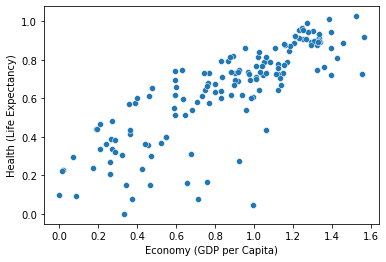

In [24]:
sns.scatterplot(data=df,x= 'Economy (GDP per Capita)',y= 'Health (Life Expectancy)' )

# 
As we see Economy (GDP per Capita) is rising the health life expectancy also rising so we drop health life expectancy cause there is a less corelation as comapred to Economy (GDP per Capita)  with features  

In [25]:
df.drop(columns= 'Health (Life Expectancy)',axis=1,inplace=True)

#  encoding process

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

df['Region']=label_encoder.fit_transform(df['Region'])

In [33]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176


In [34]:
x= df.drop(columns= ['Happiness Score'])
y=df['Happiness Score']

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [37]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)  # only features can we standardise we cant standarise label

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,1.205098,Region
1,1.097333,Standard Error
2,2.034467,Economy (GDP per Capita)
3,1.933716,Family
4,1.826797,Freedom
5,1.491867,Trust (Government Corruption)
6,1.362813,Generosity
7,1.041711,Dystopia Residual


#  VIF value is gretar than 5 we can remove this column but in this project we don't remove any column

#  Preprocessing done now we can build a model

In [40]:
# import libraryies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [41]:
maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.9932391706372257 at random_state 313


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = maxRs)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [46]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.993239170637226
R2_score on training data:  98.42069556423998
MEAN ABSOLUTE ERROR : 0.06922526640853599
MEAN SQUARED ERROR : 0.009516362701583889
ROOT MEAN SQUARED ERROR : 0.09755184622334878


In [47]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.9306220327650789
R2_score on training data:  99.92981029096616
MEAN ABSOLUTE ERROR : 0.25171431379857734
MEAN SQUARED ERROR : 0.09765457228389725
ROOT MEAN SQUARED ERROR : 0.3124973156427064


In [48]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.9088849095176846
R2_score on training data:  98.5676604723514
MEAN ABSOLUTE ERROR : 0.2748264444444444
MEAN SQUARED ERROR : 0.12825116595777747
ROOT MEAN SQUARED ERROR : 0.3581217194722731


In [49]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR= DTR.predict(x_test)
pred_train= DTR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.993239170637226
R2_score on training data:  100.0
MEAN ABSOLUTE ERROR : 0.06922526640853599
MEAN SQUARED ERROR : 0.009516362701583889
ROOT MEAN SQUARED ERROR : 0.09755184622334878


In [50]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.8511709467401525
R2_score on training data:  92.66571205960273
MEAN ABSOLUTE ERROR : 0.3556444444444445
MEAN SQUARED ERROR : 0.20948779733333334
ROOT MEAN SQUARED ERROR : 0.457698369380243


In [51]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  -0.03911979278379629
R2_score on training data:  0.0
MEAN ABSOLUTE ERROR : 1.0587968253968252
MEAN SQUARED ERROR : 1.462637245804988
ROOT MEAN SQUARED ERROR : 1.209395405070231


In [52]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.9933939480702998
R2_score on training data:  92.66571205960273
MEAN ABSOLUTE ERROR : 0.06692146339159276
MEAN SQUARED ERROR : 0.009298502123817979
ROOT MEAN SQUARED ERROR : 0.09642874117097028


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[0.88108007 0.78770758 0.64632669 0.00325457 0.71877544]
0.6074288697666576
Difference between Accuracy score  and cross validation score is -  0.38581030087056845


In [56]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())

GradientBoostingRegressor 


[-4.39467826 -0.47768806 -1.81366425 -2.52265409 -3.82799632]
-2.607336197256064
Difference between Accuracy score  and cross validation score is -  3.537958230021143


In [57]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[-8.71969431 -1.22562326 -1.0426339  -3.62667554 -6.651453  ]
-4.253216004024861
Difference between Accuracy score  and cross validation score is -  5.162100913542546


In [58]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[ -6.86165064  -9.15267924  -7.95793634 -12.92043358  -5.71703576]
-8.521947110006963
Difference between Accuracy score  and cross validation score is -  9.345938526395388


In [59]:
print('KNN ')
print('\n')
score=cross_val_score(knn, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_knn)- score.mean())

KNN 


[-11.91160921  -4.55004484  -4.06995787  -9.9676845   -6.2578939 ]
-7.351438063184306
Difference between Accuracy score  and cross validation score is -  8.202609009924458


In [60]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[-43.10536433 -11.29407049  -0.33440599 -31.93714512 -28.55351357]
-23.044899899595762
Difference between Accuracy score  and cross validation score is -  23.005780106811965


In [61]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[-0.62527745  0.76414913  0.67704151 -0.42092382  0.45861871]
0.170721613858162
Difference between Accuracy score  and cross validation score is -  0.8226723342121378


# LinearRegression is best model with this project

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params= {'alpha':[1.0,.05,.4,2], 'fit_intercept' :[True, False], 
       'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'], 
       'positive': [False, True], 
         'random_state':[1,4,10,20]}

gdsv= GridSearchCV(Ridge(),params,cv=5)
gdsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [64]:
gdsv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': False,
 'random_state': 20,
 'solver': 'saga'}

In [65]:
Final_model = Ridge(alpha=1.0, fit_intercept=True, positive=False, random_state=20, solver='saga')
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= r2_score(y_test, pred)
print(acc*100)

99.34061938766726


In [66]:
import joblib
joblib.dump(Final_model,'World Happiness Report Project')

['World Happiness Report Project']